In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
df = pd.read_csv('../data/calidad_clean_outliers.csv')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [7]:
# Convertir la columna "FECHA" a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Extraer el año, mes y día
df['ANO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month
df['DIA'] = df['FECHA'].dt.day

df[['FECHA', 'ANO', 'MES', 'DIA']].head(2)

,FECHA,ANO,MES,DIA
0,2019-01-01 05:00:00,2019,1,1
1,2019-01-01 06:00:00,2019,1,1


In [8]:
# Comprobar si se ha realizado la trensformación
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        30860 non-null  datetime64[ns]
 1   ANO          30860 non-null  int64         
 2   MES          30860 non-null  int64         
 3   DIA          30860 non-null  int64         
 4   HORA         30860 non-null  int64         
 5   DIA_SEMANA   30860 non-null  object        
 6   ESTACION     30860 non-null  float64       
 7   SO2          30860 non-null  float64       
 8   CO           30860 non-null  float64       
 9   NO2          30860 non-null  float64       
 10  PM2.5        30860 non-null  float64       
 11  PM10         30860 non-null  float64       
 12  O3           30860 non-null  float64       
 13  BTX          30860 non-null  float64       
 14  TEMPERATURA  30860 non-null  float64       
 15  HUMEDAD      30860 non-null  float64       
 16  ICA_

In [9]:
df1 = df.copy()

In [10]:
df.drop(['ANO', 'MES', 'DIA', 'HORA','ESTACION','ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2'], axis=1, inplace=True)


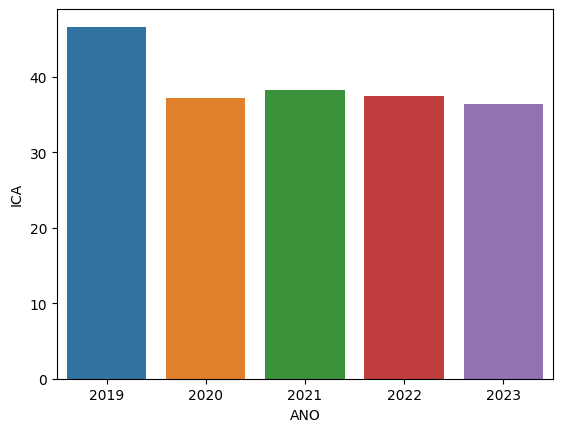

In [11]:
df_ica_ano = df1.groupby('ANO')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='ANO', y='ICA')

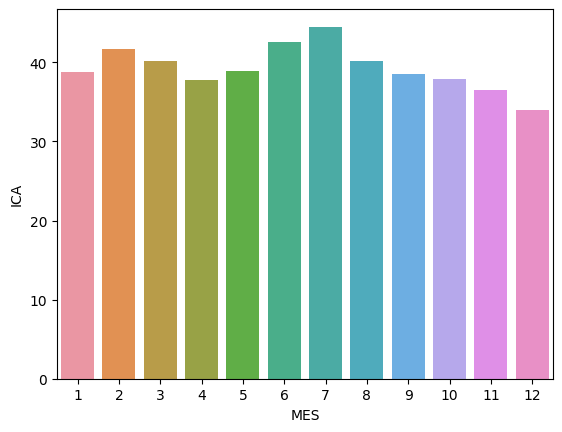

In [12]:
df_ica_ano = df1.groupby('MES')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='MES', y='ICA')

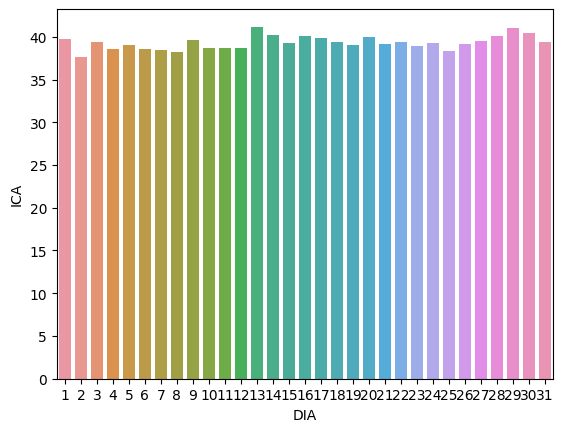

In [13]:
df_ica_ano = df1.groupby('DIA')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='DIA', y='ICA')

In [14]:
# agrupar precio medio por year y month en la misma agrupacion
# Saber trabajar con 2 columnas a la vez
df_year_month = df1.groupby(['ANO','MES'])['ICA'].mean()
df_year_month

# unstack() extrae el índice a una columna creando una TABLA PIVOTANTE por monthç/dia
df_year_month = df_year_month.unstack(level=0)
df_year_month

df_year_month = df_year_month.reset_index().rename_axis(None)
df_year_month

# unpivot: despivotar los valores de las columnas a una fila: convierte de ancho a largo
# id_vars: se duplica para cada valor úni co de año 2016, 2017, 2018
# var_name: nombre de la nueva columna al despivotar los años 2016, 2017, 2018
# value_name: nombre de la nueva columna que  tendrá los valores numéricos que estaban en 2016, 2017, 2018 
df_year_month = df_year_month.melt(var_name='ANO', id_vars='MES', value_name='ICA')
df_year_month

,MES,ANO,ICA
0,1,2019,52.264765
1,2,2019,55.814130
2,3,2019,53.390846
3,4,2019,49.787735
4,5,2019,46.978608
5,6,2019,51.109211
6,7,2019,51.031431
7,8,2019,43.161408
8,9,2019,40.023838
9,10,2019,38.584153


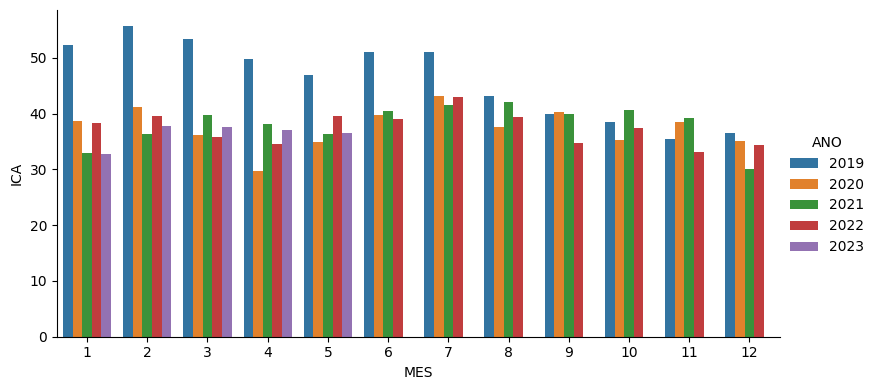

In [15]:
sns.catplot(data=df_year_month, x='MES', y='ICA', hue='ANO', kind='bar',height=4,aspect=2)

In [16]:
df_pivot = df1.pivot_table(index="MES", columns="ANO", values="SO2")
df_pivot.head(12)

ANO,2019,2020,2021,2022,2023
MES,,,,,
1,9.646217,6.653239,2.387937,3.805765,2.322537
2,8.857859,6.620568,2.471866,3.666616,2.838082
3,8.813207,7.185820,3.311116,3.487891,2.271191
4,8.700113,7.310314,3.253902,4.038735,1.169384
5,9.064783,7.940408,3.799396,4.673159,1.256185
6,9.399164,8.493376,4.547749,5.476516,NaN
7,9.861188,9.805848,5.384029,3.879526,NaN
8,4.329087,8.944484,7.563965,1.048495,NaN
9,4.213547,9.152381,4.130187,1.029326,NaN


In [17]:
df_pivot.isnull().sum()

ANO
2019    0
2020    0
2021    0
2022    0
2023    7
dtype: int64

In [18]:
df_pivot[2023.0] = df_pivot[2023.0].fillna(0)

In [19]:
df_pivot.head(12)

ANO,2019,2020,2021,2022,2023
MES,,,,,
1,9.646217,6.653239,2.387937,3.805765,2.322537
2,8.857859,6.620568,2.471866,3.666616,2.838082
3,8.813207,7.185820,3.311116,3.487891,2.271191
4,8.700113,7.310314,3.253902,4.038735,1.169384
5,9.064783,7.940408,3.799396,4.673159,1.256185
6,9.399164,8.493376,4.547749,5.476516,0.000000
7,9.861188,9.805848,5.384029,3.879526,0.000000
8,4.329087,8.944484,7.563965,1.048495,0.000000
9,4.213547,9.152381,4.130187,1.029326,0.000000


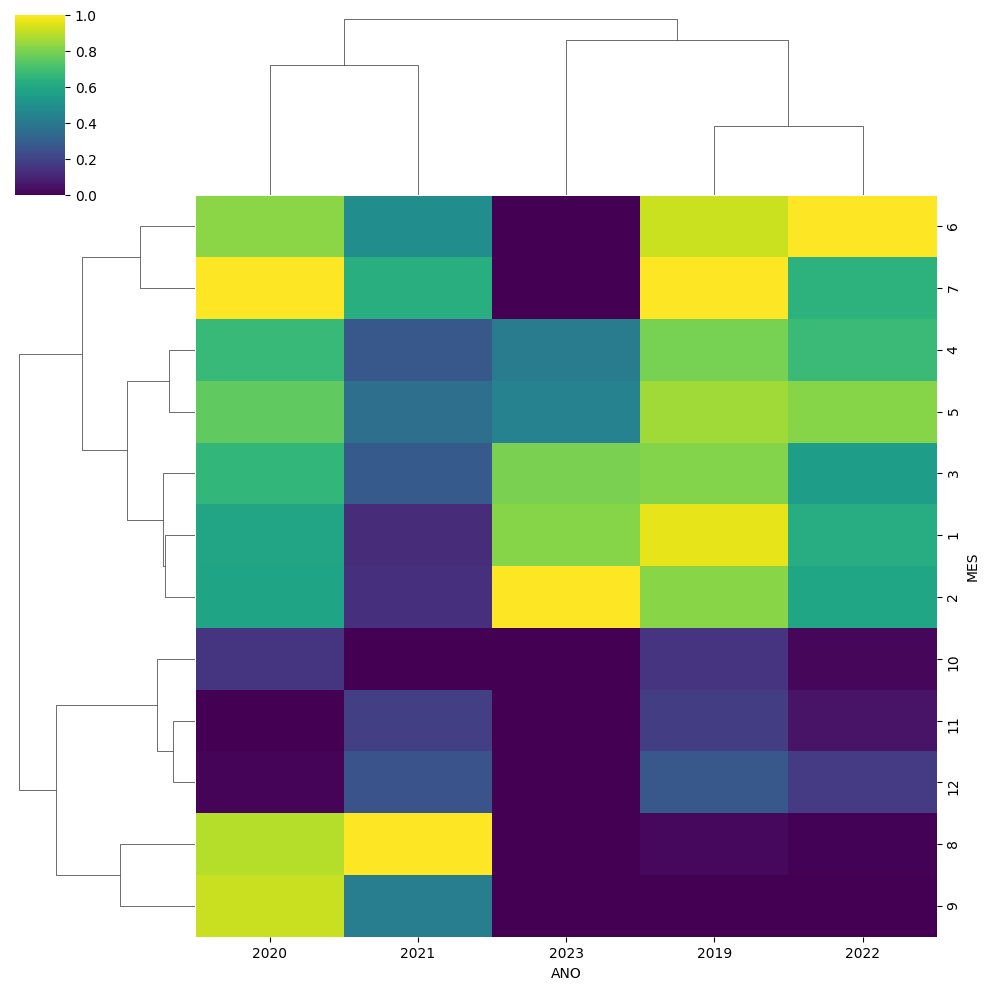

In [20]:
sns.clustermap(df_pivot, cmap="viridis", standard_scale=1)